In [1]:
import mne
import numpy as np
from mne_icalabel import label_components
import os
import git
import matplotlib.pyplot as plt

In [2]:
base_dir = git.Repo('.', search_parent_directories=True).working_tree_dir
ica_dir = os.path.join(base_dir, 'data', 'ica', 'preprocessed')
raw_dir = os.path.join(base_dir, 'data', 'raw_input')
montage_file = os.path.join(base_dir, "CACS-32_NO_REF_NO_CZ.bvef")
montage = mne.channels.read_custom_montage(montage_file)

In [5]:
subjects = list(range(301,303))
labels, probabilities = [], []

In [9]:
for subject in subjects:
    subj_ica_dir = os.path.join(ica_dir, str(subject), 'ica')
    subj_raw_dir = os.path.join(raw_dir, str(subject), str(subject)+".vhdr")
    raw = mne.io.read_raw_brainvision(subj_raw_dir, preload=True)
    raw = raw.filter(l_freq=1.0, h_freq= 100)
    raw = raw.set_eeg_reference('average')

    filt_raw_lof = raw.copy().filter(l_freq=1.0, h_freq=32.0)
    bad_channels_control, _ = mne.preprocessing.find_bad_channels_lof(filt_raw_lof, n_neighbors = 10, threshold=1.6, return_scores= True)
    
    ica = mne.preprocessing.read_ica(subj_ica_dir)
    
    raw.drop_channels(bad_channels_control)

    ic_labels = label_components(raw, ica, method='iclabel')
    labels_subj = ic_labels['labels']
    probabilities_subj = ic_labels['y_pred_proba']
    exclude_idx = [idx for idx, label in enumerate(labels_subj) if label not in ["brain", "other"] and probabilities_subj[idx] > 0.7]

    labels.append(labels_subj)
    probabilities.append(probabilities_subj)

Extracting parameters from /data/do00noto/code/model_dev_aad_semeco/data/raw_input/301/301.vhdr...
Setting channel info structure...


/tmp/ipykernel_454631/3269778601.py:4: RuntimeWarning: No coordinate information found for channels ['Aux1', 'Aux2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(subj_raw_dir, preload=True)


Reading 0 ... 4393239  =      0.000 ...  4393.239 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (3.301 s)



/tmp/ipykernel_454631/3269778601.py:4: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Aux1', 'Aux2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(subj_raw_dir, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.8s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.7s finished


LOF: Detected bad channel(s): ['Fp1', 'F7', 'F9', 'IO2', 'Fp2']
Reading /data/do00noto/code/model_dev_aad_semeco/data/ica/preprocessed/301/ica ...
Now restoring ICA solution ...
Ready.


/tmp/ipykernel_454631/3269778601.py:11: RuntimeWarning: This filename (/data/do00noto/code/model_dev_aad_semeco/data/ica/preprocessed/301/ica) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(subj_ica_dir)
/tmp/ipykernel_454631/3269778601.py:15: RuntimeWarning: The provided ICA instance was fitted with a 'infomax' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(raw, ica, method='iclabel')


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting parameters from /data/do00noto/code/model_dev_aad_semeco/data/raw_input/302/302.vhdr...
Setting channel info structure...
Reading 0 ... 4189379  =      0.000 ...  4189.379 secs...


/tmp/ipykernel_454631/3269778601.py:4: RuntimeWarning: No coordinate information found for channels ['Aux1', 'Aux2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(subj_raw_dir, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3301 samples (3.301 s)



/tmp/ipykernel_454631/3269778601.py:4: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Aux1', 'Aux2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(subj_raw_dir, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.5s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.5s finished


LOF: Detected bad channel(s): ['TP10', 'IO2']
Reading /data/do00noto/code/model_dev_aad_semeco/data/ica/preprocessed/302/ica ...
Now restoring ICA solution ...
Ready.


/tmp/ipykernel_454631/3269778601.py:11: RuntimeWarning: This filename (/data/do00noto/code/model_dev_aad_semeco/data/ica/preprocessed/302/ica) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(subj_ica_dir)
/tmp/ipykernel_454631/3269778601.py:15: RuntimeWarning: The provided ICA instance was fitted with a 'infomax' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(raw, ica, method='iclabel')


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [ ]:
import json
probabilities_list = [a.tolist() for a in probabilities]
labelling_path = os.path.join(base_dir, "data", "ica", "iclabel", "control_group.json")
data = {'labels': labels,
        'probabilites': probabilities_list}
with open(labelling_path, 'w') as file:
    json.dump(data, file)


In [ ]:
exclude_idx = []
n_excluded = []
thres_arr = [0.0, 0.25, 0.375, 0.5, 0.6, 0.7, 0.8, 0.9]
probabilities = np.array(probabilities)
for thres in thres_arr:
    exclude_idx_thres = []
    for i in range(0,28):
        labels_subj = labels[i]
        probabilities_subj = probabilities[i,:]
        ind = [idx for idx, label in enumerate(labels_subj) if label not in ["brain", "other"] and probabilities_subj[idx] > thres]
        exclude_idx_thres.append(ind)
    
    exclude_idx.append(exclude_idx_thres)

In [ ]:
n_excluded = []

for i in range(len(thres_arr)):
    n_excluded_thres = [len(a) for a in exclude_idx[i]]
    n_excluded.append(n_excluded_thres)

In [44]:
np.array(n_excluded).shape
mean_excluded = np.mean(np.array(n_excluded), axis=1)
var_excluded = np.std(np.array(n_excluded), axis=1)
lower_bounds, upper_bounds = mean_excluded - var_excluded, mean_excluded + var_excluded

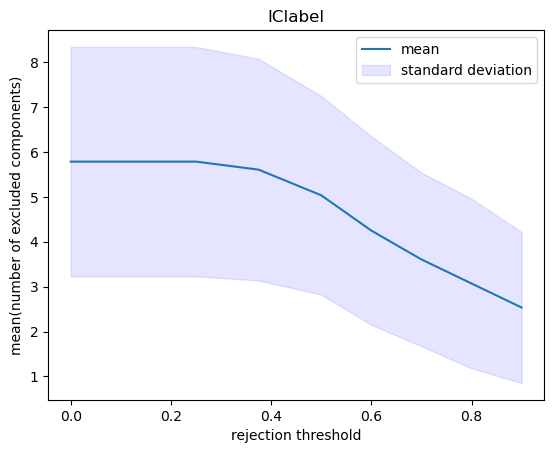

In [50]:
plt.plot(thres_arr, mean_excluded, label='mean')
plt.fill_between(thres_arr, lower_bounds, upper_bounds, color='blue', alpha=0.1, label='standard deviation')
plt.ylabel('mean(number of excluded components)')
plt.xlabel('rejection threshold')
plt.title('IClabel')
plt.legend()

In [48]:
ica.plot_properties(raw, picks=exclude_idx, psd_args = {'fmin': 1, 'fmax':95})

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (8, 28) + inhomogeneous part.

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 20 PCA components


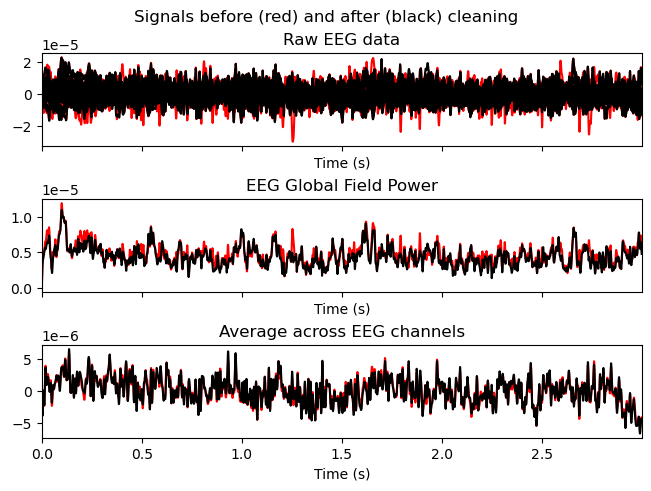

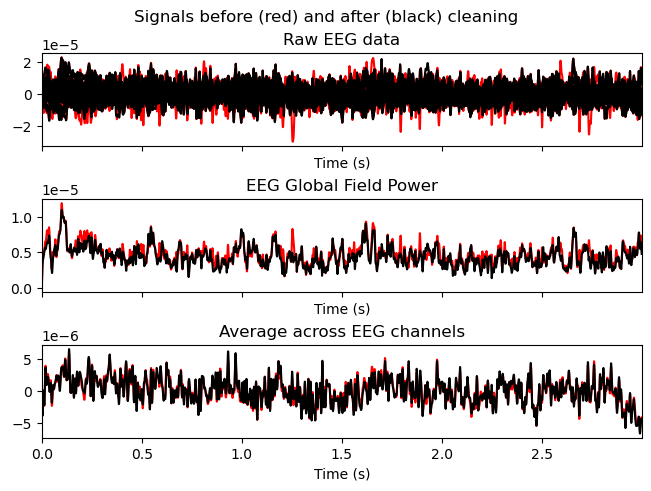

In [53]:
ica.plot_overlay(raw, exclude = exclude_idx)